In [1]:
import pandas as pd

data = pd.read_csv("C:\\Users\\Hp\\Documents\\Cleveland Dataset.csv")
data = data.apply(pd.to_numeric, errors='coerce')
print(data)


     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     69    1   0       160   234    1        2      131      0      0.1   
1     69    0   0       140   239    0        0      151      0      1.8   
2     66    0   0       150   226    0        0      114      0      2.6   
3     65    1   0       138   282    1        2      174      0      1.4   
4     64    1   0       110   211    0        2      144      1      1.8   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
292   40    1   3       152   223    0        0      181      0      0.0   
293   39    1   3       118   219    0        0      140      0      1.2   
294   35    1   3       120   198    0        0      130      1      1.6   
295   35    0   3       138   183    0        0      182      0      1.4   
296   35    1   3       126   282    0        2      156      1      0.0   

     slope  ca  thal  condition  
0        1   1     0          0  
1        0   2     

In [50]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import svm #Import svm model
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix


In [51]:
#Import the heart data
data = pd.read_csv("C:\\Users\\Hp\\Documents\\heart_disease_health_indicators_BRFSS2015.csv", delimiter=",")

In [52]:
data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [53]:
data.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [55]:
# Select the first 1000 samples from the dataset
data_subset = data.iloc[:10000]

# Separate features (x) and labels (y) from the subset
x = data_subset.drop('HeartDiseaseorAttack', axis=1)
y = data_subset['HeartDiseaseorAttack']


In [56]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=109) # 70% training and 30% test

In [57]:
#Create a svm Classifier
ml = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
start_time_train = time.time()
ml.fit(x_train, y_train)
training_time = time.time() - start_time_train


#Predict the response for test dataset
start_time_test = time.time()
y_pred = ml.predict(x_test)
testing_time = time.time() - start_time_test


In [58]:
# Model Accuracy: how often is the classifier correct?
ml.score(x_test,y_test)

0.905

In [59]:
confusion_matrix(y_test,y_pred)

array([[2715,    0],
       [ 285,    0]], dtype=int64)

In [60]:
print("Training time:", training_time)
print("Testing time:", testing_time)

Training time: 2.208087205886841
Testing time: 0.3041858673095703


[[118  42]
 [ 99  38]]


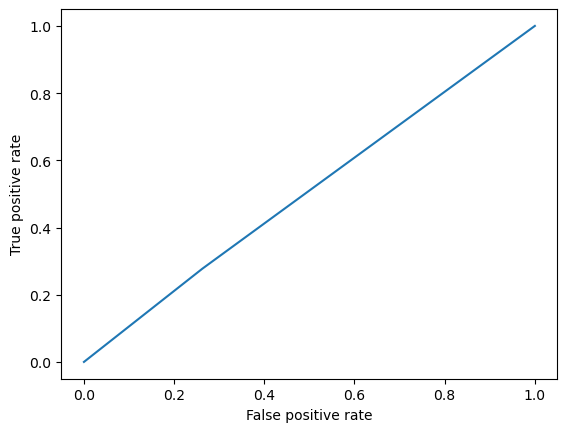

AUC: 0.5074361313868613


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc

def svm_classifier(ninp_v, nsv, nf_sv, sv, input_vectors):
    D1 = np.zeros(ninp_v)
    D2 = np.zeros(ninp_v)

    for i in range(1, ninp_v, 2):
        for j in range(nsv):
            dist1 = np.sum((sv[j, :] - input_vectors[i, :]) ** 2)
            dist2 = np.sum((sv[j, :] - input_vectors[i + 1, :]) ** 2)

            k1 = np.exp(-gamma * dist1)
            k2 = np.exp(-gamma * dist2)

            D1[i] += sv[j, -1] * k1
            D2[i] += sv[j, -1] * k2

    return D1, D2


if __name__ == "__main__":
    data = pd.read_csv("C:\\Users\\Hp\\Documents\\Cleveland Dataset.csv", delimiter=",")
    data = data.apply(pd.to_numeric, errors='coerce').dropna()
    input_vectors = data.iloc[:, 0:13].values
    output = data.iloc[:, 13].values

    
    output = (output == 1).astype(int)

    
    nsv = 10
    nf_sv = 13
    gamma = 0.01
    bi = 0

    #
    D1, D2 = svm_classifier(len(input_vectors), nsv, nf_sv, input_vectors, input_vectors)

    # Print the confusion matrix.
    print(confusion_matrix(output, D1 > D2))

    # Plot the ROC curve.
    fpr, tpr, thresholds = roc_curve(output, D1 > D2)
    plt.plot(fpr, tpr)
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.show()
    # Print the area under the curve.
    print("AUC:", auc(fpr, tpr))

In [61]:
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

if __name__ == "__main__":
    # Load the Cleveland dataset using Pandas, skip the first row (header), and specify the delimiter
    data = pd.read_csv("C:\\Users\\Hp\\Documents\\heart.csv", delimiter=",")

    # Convert the DataFrame to a NumPy array and remove any non-numeric rows
    data = data.apply(pd.to_numeric, errors='coerce').dropna()

    # Split the data into input (features) and output (target) variables
    input_vectors = data.iloc[:, 0:13].values
    output = (data.iloc[:, 13].values == 1).astype(int)

    # Split the data into training and testing sets
    input_train, input_test, output_train, output_test = train_test_split(input_vectors, output, test_size=0.2, random_state=42)

    # Set the hyperparameters.
    n_estimators = 10  # Number of trees in the forest
    max_depth = 5  # Maximum depth of the decision trees. Set to None for full tree growth.
    min_samples_split = 5  # Minimum number of samples required to split an internal node

    # Build the Random Forest classifier
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )

    # Train the classifier on the training data
    start_time_train = time.time()
    rf_classifier.fit(input_train, output_train)
    training_time = time.time() - start_time_train

    # Make predictions on the test data
    start_time_test = time.time()
    predictions = rf_classifier.predict(input_test)
    testing_time = time.time() - start_time_test

    
    # Print the confusion matrix for the testing set
    print("Confusion Matrix:")
    print(confusion_matrix(output_test, predictions))

    # Calculate the accuracy of the classifier
    accuracy = accuracy_score(output_test, predictions)
    print("Accuracy:", accuracy)
    
    print("Training time:", training_time)
    print("Testing time:", testing_time)


Confusion Matrix:
[[82 20]
 [ 7 96]]
Accuracy: 0.8682926829268293
Training time: 0.06682372093200684
Testing time: 0.004983663558959961


In [62]:
import numpy as np
import time
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


# Load the Cleveland dataset using Pandas
data = pd.read_csv("C:\\Users\\Hp\\Documents\\heart.csv", delimiter=",")

# Convert the DataFrame to a NumPy array and remove any non-numeric rows
data = data.apply(pd.to_numeric, errors='coerce').dropna()

# Split the data into input (features) and output (target) variables
input_vectors = data.iloc[:, 0:13].values
output = (data.iloc[:, 13].values == 1).astype(int)

# Set hyperparameters
n_estimators = 10
max_depth = 5
min_samples_split = 5
min_samples_leaf = 2

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                       random_state=42)

# Perform K-fold cross-validation 
k_fold = 10
accuracy_scores = cross_val_score(rf_classifier, input_vectors, output, cv=k_fold)

# Print accuracy for each fold and the mean accuracy
print("Accuracy Scores for Each Fold:")
print(accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))

# Train the model on the full training set
input_train, input_test, output_train, output_test = train_test_split(input_vectors, output, test_size=0.2, random_state=42)
start_time_train = time.time()
rf_classifier.fit(input_train, output_train)
training_time = time.time() - start_time_train

# Predict on the test set
start_time_test = time.time()
predictions = rf_classifier.predict(input_test)
testing_time = time.time() - start_time_test

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(output_test, predictions)
conf_matrix = confusion_matrix(output_test, predictions)

print("Accuracy on Test Set:", accuracy)
print("Confusion Matrix on Test Set:")
print(conf_matrix)

print("Training time:", training_time)
print("Testing time:", testing_time)



Accuracy Scores for Each Fold:
[0.89320388 0.99029126 0.91262136 0.89320388 0.89320388 0.92156863
 0.88235294 0.87254902 0.88235294 0.8627451 ]
Mean Accuracy: 0.900409289929564
Accuracy on Test Set: 0.8585365853658536
Confusion Matrix on Test Set:
[[80 22]
 [ 7 96]]
Training time: 0.03390932083129883
Testing time: 0.001990795135498047


Accuracy Scores for Each Fold:
[0.90641753 0.90602334 0.90622044 0.90641753 0.90606276 0.90629927
 0.9059445  0.90645695 0.90610218 0.9061416 ]
Mean Accuracy: 0.9062086092715231
Accuracy on Test Set: 0.906535793125197
Confusion Matrix on Test Set:
[[45958    10]
 [ 4732    36]]
Area Under the Curve (AUC): 0.8291951427911918
Training time: 1.1399600505828857
Testing time: 0.04087996482849121


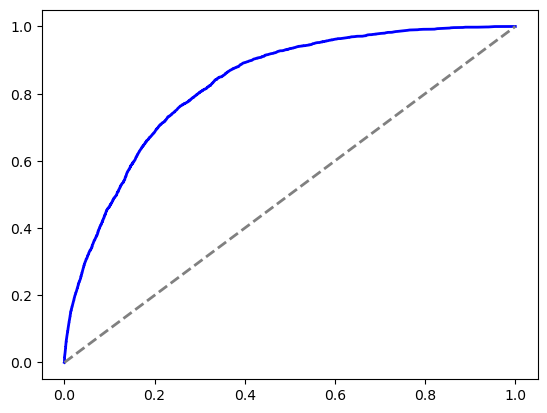

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

# Load the Cleveland dataset using Pandas
data = pd.read_csv("C:\\Users\\Hp\\Documents\\heart_disease_health_indicators_BRFSS2015.csv", delimiter=",")

# Convert the DataFrame to a NumPy array and remove any non-numeric rows
data = data.apply(pd.to_numeric, errors='coerce').dropna()

# Split the data into input (features) and output (target) variables
input_vectors = data.iloc[:, 1:].values
output = (data.iloc[:, 0].values == 1).astype(int)

# Set hyperparameters
n_estimators = 10
max_depth = 5
min_samples_split = 5
min_samples_leaf = 2

# Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
                                       random_state=42)

# Perform K-fold cross-validation 
k_fold = 10
accuracy_scores = cross_val_score(rf_classifier, input_vectors, output, cv=k_fold)

# Print accuracy for each fold and the mean accuracy
print("Accuracy Scores for Each Fold:")
print(accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))

# Train the model on the full training set
input_train, input_test, output_train, output_test = train_test_split(input_vectors, output, test_size=0.2, random_state=42)
start_time_train = time.time()
rf_classifier.fit(input_train, output_train)
training_time = time.time() - start_time_train


# Predict on the test set
start_time_test = time.time()
predictions = rf_classifier.predict(input_test)
testing_time = time.time() - start_time_test


# Calculate accuracy and confusion matrix
accuracy = accuracy_score(output_test, predictions)
conf_matrix = confusion_matrix(output_test, predictions)

print("Accuracy on Test Set:", accuracy)
print("Confusion Matrix on Test Set:")
print(conf_matrix)

# Calculate ROC curve and AUC
probabilities = rf_classifier.predict_proba(input_test)[:, 1]  # Probability of positive class (class 1)
fpr, tpr, thresholds = roc_curve(output_test, probabilities)
auc = roc_auc_score(output_test, probabilities)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

# Print the Area Under the Curve (AUC)
print("Area Under the Curve (AUC):", auc)

print("Training time:", training_time)
print("Testing time:", testing_time)


In [ ]:
import os

file1 = "C:\\Users\\Hp\\Documents\\processed.cleveland.data"
file2 = "C:\\Users\\Hp\\Documents\\processed.switzerland.data"
file3 = "C:\\Users\\Hp\\Documents\\processed.va.data"
file4 = "C:\\Users\\Hp\\Documents\\reprocessed.hungarian.data"

# Combine the contents of the three files into one file
output_file = "combined_heart.txt"  # You can change the file name here
output_path = os.path.join(os.getcwd(), output_file)

with open(output_file, "w") as outfile:
    for filename in [file1, file2, file3, file4]:
        with open(filename, "r") as infile:
            outfile.write(infile.read())

print("Output file path:", output_path)            


In [ ]:
import csv

# Input .txt file name
input_file = "combined_heart.txt"

# Output .csv file name
output_file = "combined_heart.csv"

# Create a list to store the data from the .txt file
data = []

# Read the contents of the .txt file and store them in the data list
with open(input_file, "r") as infile:
    for line in infile:
        data.append(line.strip().split())

# Write the data to a .csv file
with open(output_file, "w", newline="") as csvfile:
    print(csvfile.mode)
    writer = csv.writer(csvfile, delimiter=",")
    writer.writerows(data)

# Get the path of the output .csv file
import os
output_path = os.path.join(os.getcwd(), output_file)

print("CSV file has been created and saved at:", output_path)


In [68]:
import numpy as np
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.decomposition import PCA


# Decision Tree class implementation
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = DecisionTreeClassifier(max_depth=self.max_depth)
        self.tree.fit(X, y)

    def evaluate(self, X):
        if self.tree is not None:
            return self.tree.predict_proba(X)[:, 1]  # Return the probability of the positive class
        else:
            raise ValueError("The tree is not fitted yet.")

# Read the data from the .csv file (assuming the data is comma-separated)
data = pd.read_csv("C:\\Users\\Hp\\Documents\\heart_disease_health_indicators_BRFSS2015.csv", delimiter=",")

# Convert the DataFrame to a NumPy array and remove any non-numeric rows
data = data.apply(pd.to_numeric, errors='coerce').dropna()

# Split the data into input (features) and output (target) variables
input_vectors = data.iloc[:, 1:].values
output = (data.iloc[:, 0].values == 1).astype(int)

# Set the hyperparameters.
K = 40  # Number of trees in the forest
R = 5  # Number of randomly selected features for each tree
max_depth = 10  # Maximum depth of each decision tree

# Perform K-fold cross-validation
accuracy_list = []
auc_list = []
for k in range(K):
    # Split the data into training and testing sets for this fold
    input_train, input_test, output_train, output_test = train_test_split(input_vectors, output, test_size=0.2, random_state=k)

    # Build the forest
    predictions = np.zeros(len(input_test))
    for i in range(K):
        # Randomly select R features
        selected_features = np.random.choice(input_train.shape[1], R, replace=False)
        selected_input_train = input_train[:, selected_features]

        # Build and train a decision tree
        tree = DecisionTree(max_depth=max_depth)
        start_time_train = time.time()
        tree.fit(selected_input_train, output_train)
        training_time = time.time() - start_time_train
        
        
        start_time_test = time.time()    
        tree_predictions = tree.evaluate(input_test[:, selected_features])
        predictions += tree_predictions
        testing_time = time.time() - start_time_test

    # Average the predictions to get the final output
    predictions /= K

    # Convert probabilities to binary predictions (0 or 1)
    predictions_binary = (predictions > 0.5).astype(int)

    # Calculate accuracy for this fold and add it to the accuracy_list
    accuracy = np.sum(predictions_binary == output_test) / len(output_test)
    accuracy_list.append(accuracy)

    # Calculate and print the confusion matrix for this fold
    cm = confusion_matrix(output_test, predictions_binary)
    print(f"Confusion Matrix for Fold {k+1}:\n{cm}")

    # Calculate and print the ROC curve and AUC for this fold
    fpr, tpr, thresholds = roc_curve(output_test, predictions)
    auc = roc_auc_score(output_test, predictions)
    auc_list.append(auc)
    print(f"AUC for Fold {k+1}: {auc}")

    # Print accuracy for this fold
    print(f"Accuracy for Fold {k+1}: {accuracy}\n")

# Calculate and print the average accuracy and AUC over all folds
average_accuracy = np.mean(accuracy_list)
average_auc = np.mean(auc_list)
print(f"Average Accuracy: {average_accuracy}")
print(f"Average AUC: {average_auc}")

print("Training time:", training_time)
print("Testing time:", testing_time)



Confusion Matrix for Fold 1:
[[45964     0]
 [ 4772     0]]
AUC for Fold 1: 0.8379416508987718
Accuracy for Fold 1: 0.9059444970040996

Confusion Matrix for Fold 2:
[[46004     0]
 [ 4732     0]]
AUC for Fold 2: 0.8324114246047037
Accuracy for Fold 2: 0.9067328918322296

Confusion Matrix for Fold 3:
[[45967     0]
 [ 4769     0]]
AUC for Fold 3: 0.8283834729996731
Accuracy for Fold 3: 0.9060036266162094

Confusion Matrix for Fold 4:
[[46004     0]
 [ 4732     0]]
AUC for Fold 4: 0.8390343785938568
Accuracy for Fold 4: 0.9067328918322296

Confusion Matrix for Fold 5:
[[45891     0]
 [ 4845     0]]
AUC for Fold 5: 0.8245281709054427
Accuracy for Fold 5: 0.9045056764427626

Confusion Matrix for Fold 6:
[[45966     0]
 [ 4770     0]]
AUC for Fold 6: 0.8335650058000212
Accuracy for Fold 6: 0.9059839167455062

Confusion Matrix for Fold 7:
[[45999     0]
 [ 4737     0]]
AUC for Fold 7: 0.8300029060025411
Accuracy for Fold 7: 0.9066343424787133

Confusion Matrix for Fold 8:
[[45922     0]
 [ 4